In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r'.\csv\ECO_DATA_TOTAL_STATS_2023.csv', encoding='cp949')

feature_cols = [
    '전년전기 절감률',
    '전년가스 절감률',
    '전년수도 절감률',
    '전년지역난방 절감률'
]
target_col = '전년 탄소 증감률'


In [15]:
df = df.dropna(subset=feature_cols + [target_col])

X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42
)

In [19]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

Mean Squared Error (MSE): 39004.4445357156
R-squared (R2): -1.9941596244514406


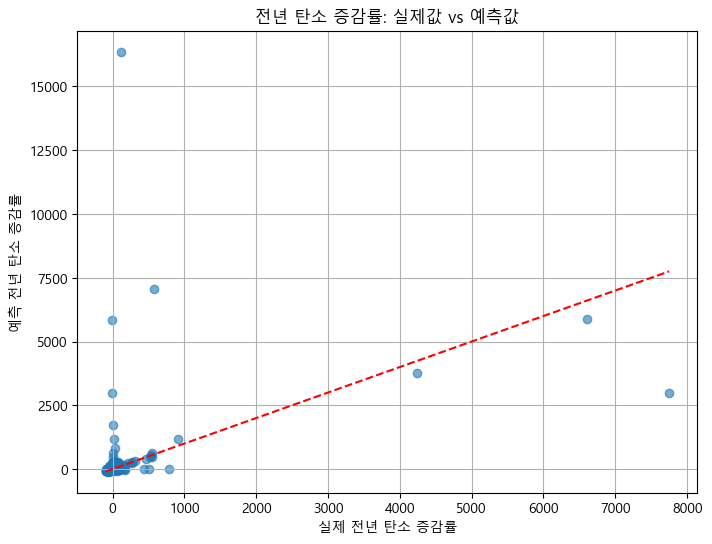

      Feature  Coefficient
0    전년전기 절감률     0.889773
1    전년가스 절감률     0.005619
2    전년수도 절감률     0.383285
3  전년지역난방 절감률    -0.000098


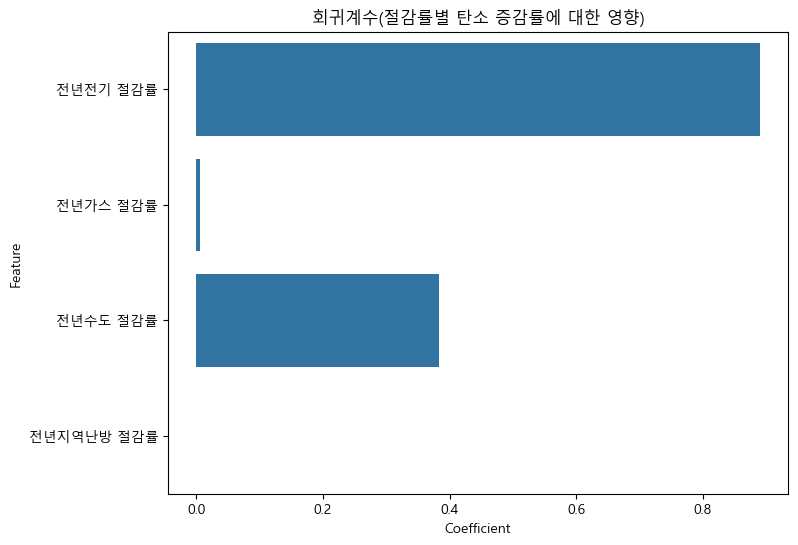

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('실제 전년 탄소 증감률')
plt.ylabel('예측 전년 탄소 증감률')
plt.title('전년 탄소 증감률: 실제값 vs 예측값')
plt.grid(True)
plt.show()

coeff_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_
})
print(coeff_df)

plt.figure(figsize=(8, 6))
sns.barplot(data=coeff_df, x='Coefficient', y='Feature')
plt.title('회귀계수(절감률별 탄소 증감률에 대한 영향)')
plt.show()

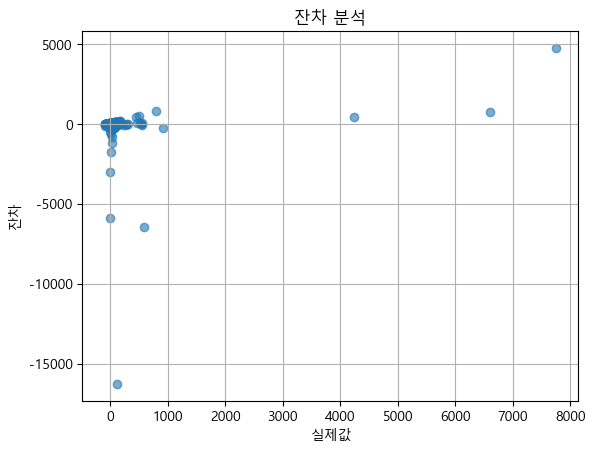

In [21]:
plt.scatter(y_test, y_test - y_pred, alpha=0.6)
plt.xlabel('실제값')
plt.ylabel('잔차')
plt.title('잔차 분석')
plt.grid(True)
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Mean Squared Error (MSE): 39004.4445357156
R-squared (R2): -1.9941596244514406


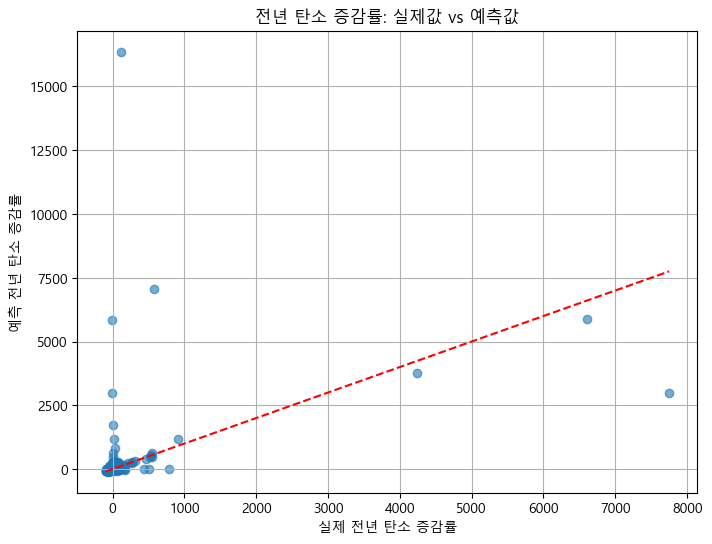

      Feature  Coefficient
0    전년전기 절감률     0.889773
1    전년가스 절감률     0.005619
2    전년수도 절감률     0.383285
3  전년지역난방 절감률    -0.000098


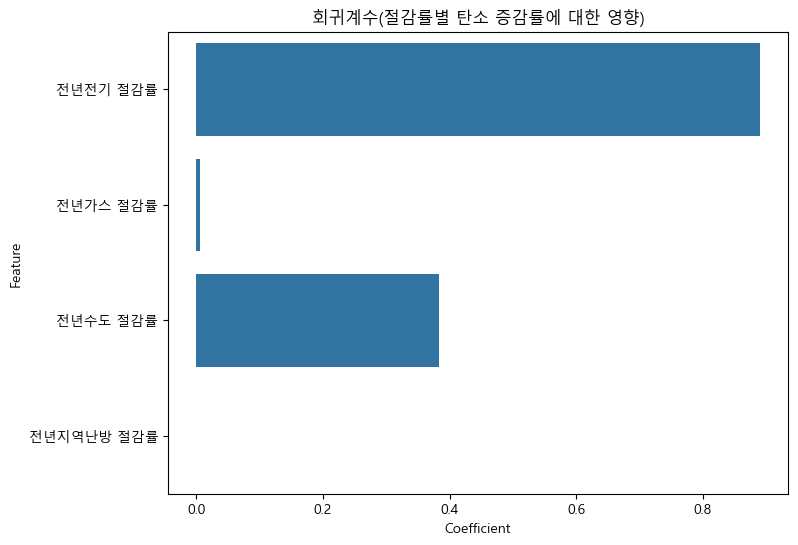

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('실제 전년 탄소 증감률')
plt.ylabel('예측 전년 탄소 증감률')
plt.title('전년 탄소 증감률: 실제값 vs 예측값')
plt.grid(True)
plt.show()

coeff_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_
})
print(coeff_df)

plt.figure(figsize=(8, 6))
sns.barplot(data=coeff_df, x='Coefficient', y='Feature')
plt.title('회귀계수(절감률별 탄소 증감률에 대한 영향)')
plt.show()

Mean Squared Error (MSE): 39004.4445357156
R-squared (R2): -1.9941596244514406


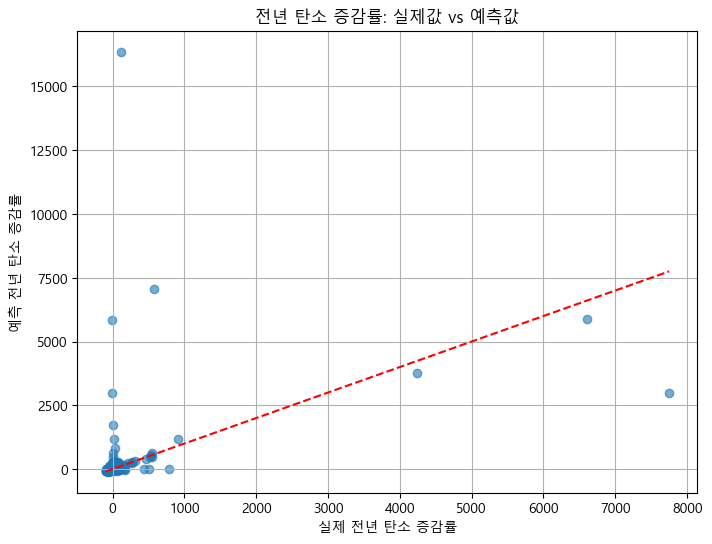

      Feature  Coefficient
0    전년전기 절감률     0.889773
1    전년가스 절감률     0.005619
2    전년수도 절감률     0.383285
3  전년지역난방 절감률    -0.000098


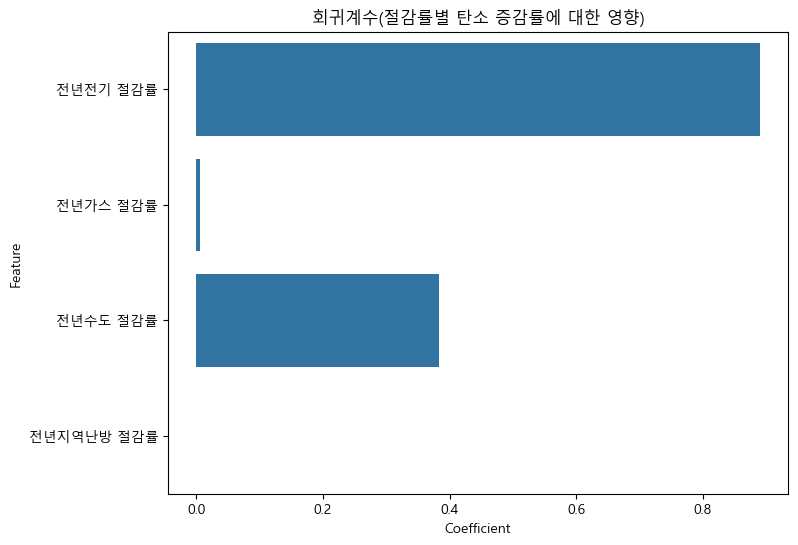

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('실제 전년 탄소 증감률')
plt.ylabel('예측 전년 탄소 증감률')
plt.title('전년 탄소 증감률: 실제값 vs 예측값')
plt.grid(True)
plt.show()

coeff_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_
})
print(coeff_df)

plt.figure(figsize=(8, 6))
sns.barplot(data=coeff_df, x='Coefficient', y='Feature')
plt.title('회귀계수(절감률별 탄소 증감률에 대한 영향)')
plt.show()

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

최적의 파라미터: {'ridge__alpha': 0.1}
테스트 MSE: 0.4487899034673533
테스트 R²: 0.99999999997294


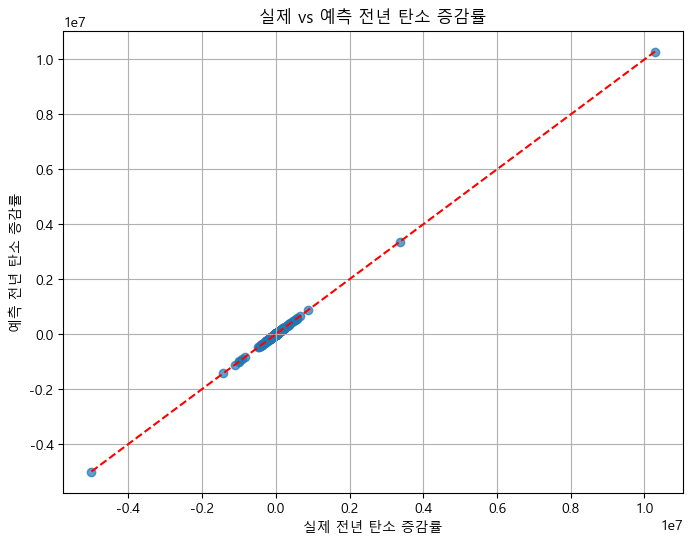

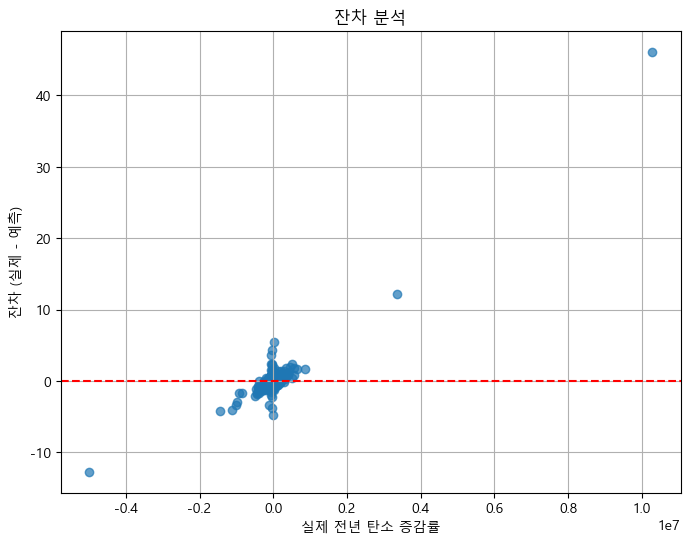

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r'.\csv\ECO_DATA_TOTAL_STATS_2023.csv', encoding='cp949')

df['전년전기 절감률_calculated'] = df['현년 전기사용량'] - df['전년 전기사용량']
df['전년가스 절감률_calculated'] = df['현년 가스사용량'] - df['전년 가스사용량']
df['전년수도 절감률_calculated'] = df['현년 수도사용량'] - df['전년 수도사용량']
df['전년지역난방 절감률_calculated'] = df['현년 지역난방 사용량'] - df['전년 지역난방 사용량']
df['전년 탄소 증감률_calculated'] = df['현년 탄소'] - df['전년 탄소']

calc_cols = [
    '전년전기 절감률_calculated', 
    '전년가스 절감률_calculated', 
    '전년수도 절감률_calculated', 
    '전년지역난방 절감률_calculated', 
    '전년 탄소 증감률_calculated'
]
df = df.dropna(subset=calc_cols)

feature_cols = [
    '전년전기 절감률_calculated',
    '전년가스 절감률_calculated',
    '전년수도 절감률_calculated',
    '전년지역난방 절감률_calculated'
]
target_col = '전년 탄소 증감률_calculated'
X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge())
])

param_grid = {
    'ridge__alpha': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("최적의 파라미터:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("테스트 MSE:", mse)
print("테스트 R²:", r2)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('실제 전년 탄소 증감률')
plt.ylabel('예측 전년 탄소 증감률')
plt.title('실제 vs 예측 전년 탄소 증감률')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test - y_pred, alpha=0.7)
plt.xlabel('실제 전년 탄소 증감률')
plt.ylabel('잔차 (실제 - 예측)')
plt.title('잔차 분석')
plt.axhline(0, color='r', linestyle='--')
plt.grid(True)
plt.show()


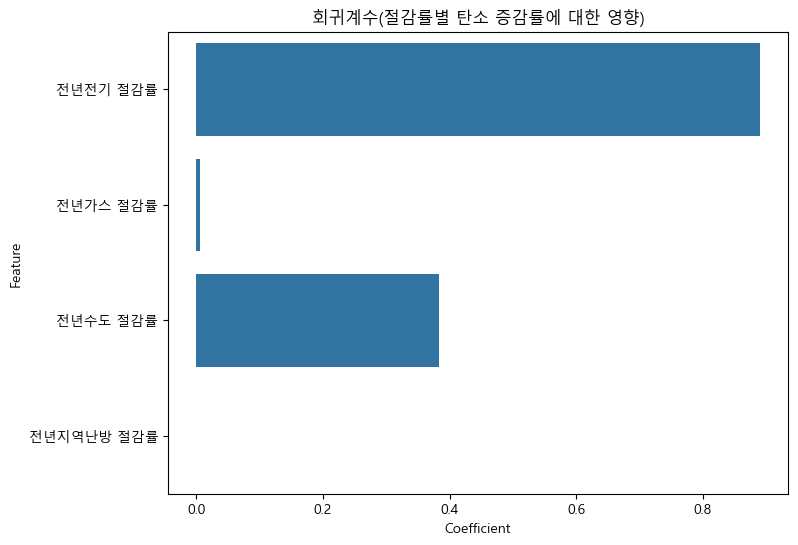

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(data=coeff_df, x='Coefficient', y='Feature')
plt.title('회귀계수(절감률별 탄소 증감률에 대한 영향)')
plt.show()

In [39]:
feature_cols = [
    '전년전기 절감률',
    '전년가스 절감률',
    '전년수도 절감률',
    '전년지역난방 절감률'
]
target_col = '전년 탄소 증감률'

df = df.dropna(subset=feature_cols + [target_col])

X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42
)

In [40]:
# PolynomialFeatures를 이용해 각 변수간의 상호작용 항(곱) 생성
# interaction_only=True이면 각 변수의 제곱은 제외하고 상호작용 항만 생성
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

Mean Squared Error (MSE): 45430.597559098685
R-squared (R2): -2.4874605329041084


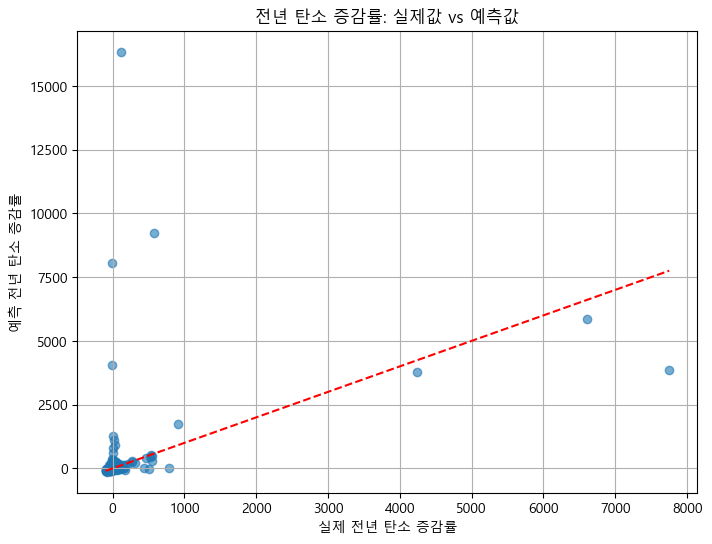

In [41]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('실제 전년 탄소 증감률')
plt.ylabel('예측 전년 탄소 증감률')
plt.title('전년 탄소 증감률: 실제값 vs 예측값')
plt.grid(True)
plt.show()

In [42]:
feature_names = poly.get_feature_names_out(feature_cols)
coefficients = model.coef_
intercept = model.intercept_

In [43]:
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

print("Intercept:", intercept)
print(coeff_df)

Intercept: -3.1078473908222986
               Feature  Coefficient
0             전년전기 절감률     0.888299
1             전년가스 절감률     0.028812
2             전년수도 절감률     0.497587
3           전년지역난방 절감률     0.000237
4    전년전기 절감률 전년가스 절감률     0.000733
5    전년전기 절감률 전년수도 절감률    -0.003589
6  전년전기 절감률 전년지역난방 절감률    -0.000134
7    전년가스 절감률 전년수도 절감률    -0.001025
8  전년가스 절감률 전년지역난방 절감률     0.000040
9  전년수도 절감률 전년지역난방 절감률    -0.000022


In [45]:
# 절감률 대신 절대적인 양으로 비
feature_cols = [
    '현년 전기사용량',
    '현년 가스사용량',
    '현년 수도사용량',
    '현년 지역난방 사용량'
]
target_col = '현년 탄소'

df = df.dropna(subset=feature_cols + [target_col])

X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42
)

In [46]:
# PolynomialFeatures를 이용해 각 변수간의 상호작용 항(곱) 생성
# interaction_only=True이면 각 변수의 제곱은 제외하고 상호작용 항만 생성
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

Mean Squared Error (MSE): 0.08313354347185017
R-squared (R2): 0.9999999999998533


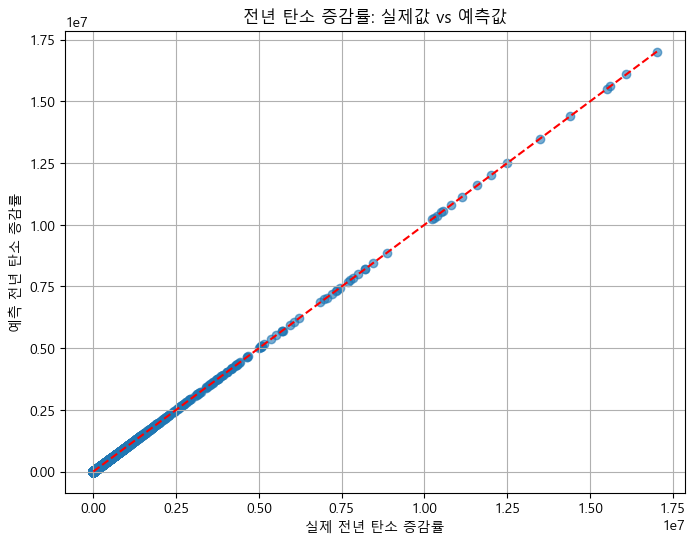

In [47]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('실제 전년 탄소 증감률')
plt.ylabel('예측 전년 탄소 증감률')
plt.title('전년 탄소 증감률: 실제값 vs 예측값')
plt.grid(True)
plt.show()

In [50]:
feature_names = poly.get_feature_names_out(feature_cols)
coefficients = model.coef_
intercept = model.intercept_

coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

print("Intercept:", intercept)
print(coeff_df)

Intercept: 0.0014566811732947826
                Feature   Coefficient
0              현년 전기사용량  4.240000e-01
1              현년 가스사용량  2.240000e+00
2              현년 수도사용량  3.320001e-01
3           현년 지역난방 사용량 -5.043169e-08
4     현년 전기사용량 현년 가스사용량 -2.664535e-15
5     현년 전기사용량 현년 수도사용량 -4.107825e-15
6  현년 전기사용량 현년 지역난방 사용량  9.863768e-14
7     현년 가스사용량 현년 수도사용량  2.869996e-13
8  현년 가스사용량 현년 지역난방 사용량 -7.260045e-13
9  현년 수도사용량 현년 지역난방 사용량 -7.649224e-13
